## Model Training 

#### 1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library. 

In [30]:
# Basic Import 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Modeling 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings

#### Import the CSV Data as Pandas DataFrame 

In [6]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records 

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and y Variable

In [8]:
X = df.drop(columns=['math_score'], axis=1)

In [9]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [11]:
y = df['math_score']

In [12]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [14]:
# Create Column Transformer with 3 Type of transformers 
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ('OneHotEncoder', oh_transformer, cat_features),
    ('StandarScaler', numeric_transformer, num_features),
])

In [16]:
X = preprocessor.fit_transform(X)

In [17]:
X.shape

(1000, 19)

In [18]:
# Separate data into trian and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [21]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_scor = r2_score(true, predicted)
    return mae, mse, rmse, r2_scor

In [32]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

models = {
    "Linear Regression": LinearRegression(), 
    'Lasso': Lasso(), 
    'Ridge': Ridge(), 
    'K-Neighbors Regressor': KNeighborsRegressor(), 
    'Decision Tree': DecisionTreeRegressor(), 
    "Random Forest Regressor": RandomForestRegressor(), 
    "XGBBoosting Regressor": XGBRegressor(), 
    "CatBoost Regressor": CatBoostRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for name, model in models.items():
    model.fit(X_train, y_train) # Train model
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(name)
    model_list.append(name)
    
    print('Model performance for Training set')
    print(f"- Mean Absolute Error: {train_mae:.4f}")
    print(f"- Mean Squared Error: {train_mse:.4f}")
    print(f"- Root Mean Squared Error: {train_rmse:.4f}")
    print(f"- R2 Score: {train_r2:.4f}")

    print('----------------------------------')
    
    print('Model performance for Test set')
    print(f"- Mean Absolute Error: {test_mae:.4f}")
    print(f"- Mean Squared Error: {test_mse:.4f}")
    print(f"- Root Mean Squared Error: {test_rmse:.4f}")
    print(f"- R2 Score: {test_r2:.4f}")
    r2_list.append(test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Mean Absolute Error: 4.2695
- Mean Squared Error: 28.3627
- Root Mean Squared Error: 5.3257
- R2 Score: 0.8742
----------------------------------
Model performance for Test set
- Mean Absolute Error: 4.2347
- Mean Squared Error: 29.3889
- Root Mean Squared Error: 5.4212
- R2 Score: 0.8792


Lasso
Model performance for Training set
- Mean Absolute Error: 5.2063
- Mean Squared Error: 43.4784
- Root Mean Squared Error: 6.5938
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Mean Absolute Error: 5.1579
- Mean Squared Error: 42.5064
- Root Mean Squared Error: 6.5197
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Mean Absolute Error: 4.2650
- Mean Squared Error: 28.3378
- Root Mean Squared Error: 5.3233
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Mean Absolute Error: 4.2111
- Mean Squared Error: 29.0563
- Root Mean Squared Error: 5.3904
- R2

#### Result

In [34]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model_name', 'R2_socre']).sort_values(by=['R2_socre'], ascending=False)

,Model_name,R2_socre
2,Ridge,0.880593
0,Linear Regression,0.879226
7,CatBoost Regressor,0.851632
8,AdaBoost Regressor,0.849104
5,Random Forest Regressor,0.845746
6,XGBBoosting Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.711862


### Linear Regression 

In [35]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print(" Accuracy of the model is %.2f"%score)

 Accuracy of the model is 87.92


### plot y_pred and y_test

Text(0, 0.5, 'Predicted')

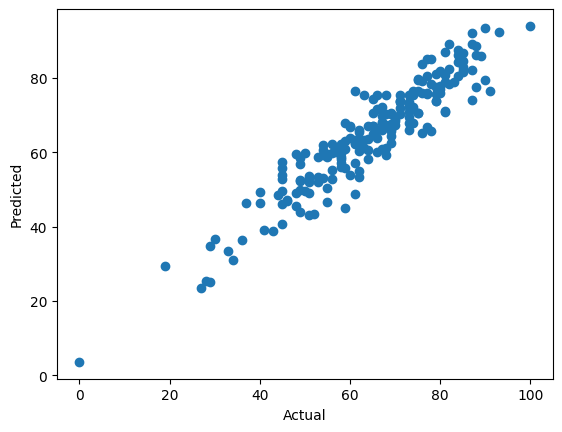

In [36]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

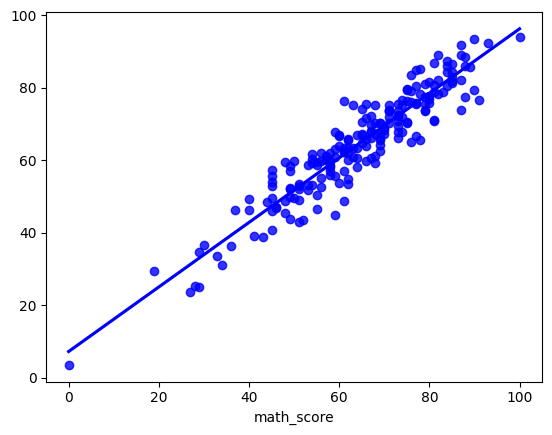

In [37]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='blue')

#### Difference between Actual and Predicted Values

In [40]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value' : y_pred, 'Difference' : y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.546875,14.453125
737,53,58.839844,-5.839844
740,80,76.945312,3.054688
660,74,76.570312,-2.570312
411,84,87.535156,-3.535156
...,...,...,...
408,52,43.468750,8.531250
332,62,62.042969,-0.042969
208,74,67.843750,6.156250
613,65,67.167969,-2.167969
